In [36]:
#####################################################################################################################

#  The code in the following cell reads and stores the cardio data into data1 dataframe and first 5 is checked
#  to see whether data is correctly loaded.

####################################################################################################################


# The following code is used to ignore warnings that come in the output of jupyter console
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
from sklearn.metrics import roc_auc_score


# loading or reading diabetes.csv into data1 as a dataframe 
data1=pd.read_csv('cardio_train.csv',sep=';')

# preserving the column names so that we can restore the columns when required
columns_original=data1.columns

# checking if the data has been successfully loaded or not by seeing top 5 records/observations
print(data1.shape)
data1.head()

(69301, 13)


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,988,22469,1,155,69.0,130,80,2,2,0,0,1,0
1,989,14648,1,163,71.0,110,70,1,1,0,0,1,1
2,990,21901,1,165,70.0,120,80,1,1,0,0,1,0
3,991,14549,2,165,85.0,120,80,1,1,1,1,1,0
4,992,23393,1,155,62.0,120,80,1,1,0,0,1,0


In [37]:
#####################################################################################################################

#  chaecking min,max, mean and other description about data

####################################################################################################################
data1.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000,69301.000000
mean,50471.480397,19468.786280,1.349519,164.362217,74.203027,128.829584,96.650092,1.366806,1.226447,0.088051,0.053881,0.803986,0.499589
std,28563.100347,2467.261818,0.476821,8.205337,14.383469,154.775805,189.096240,0.680270,0.572246,0.283371,0.225784,0.396982,0.500003
min,988.000000,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25745.000000,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50494.000000,19704.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75150.000000,21326.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [38]:
#########################################################
# checking if there are any null values
#########################################################


data1.isnull().sum()

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

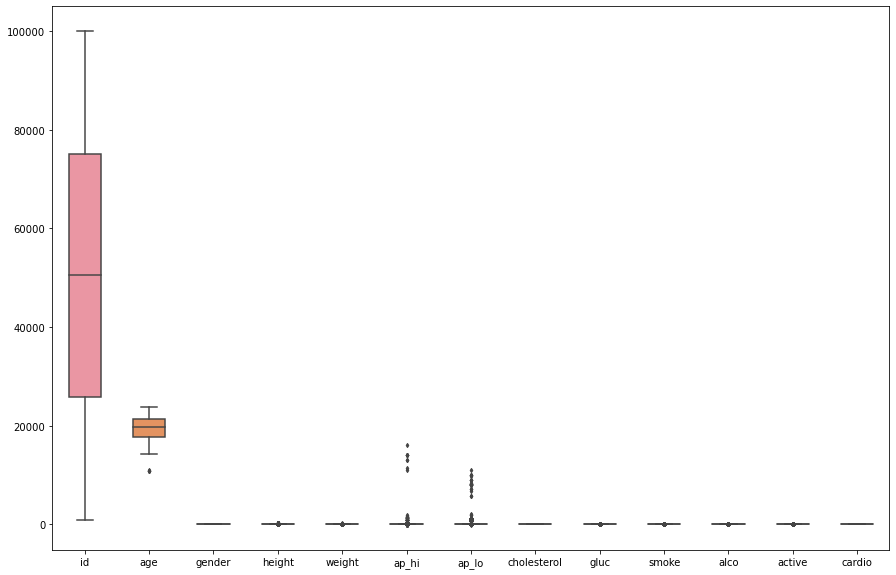

In [39]:
###################################################################

#  Plotting box plot to see if there are any outliers

###################################################################

import matplotlib.pyplot as plt
import seaborn as sns

fig, ax = plt.subplots(figsize=(15,10))
sns.boxplot(data=data1, width= 0.5,ax=ax,  fliersize=3)


In [40]:
###################################################################

# Removing outliers

###################################################################

q = data1['ap_hi'].quantile(0.98)
# we are removing the top 2% data from the Pregnancies column
data_cleaned = data1[data1['ap_hi']<q]
q = data_cleaned['ap_lo'].quantile(0.99)
# we are removing the top 1% data from the BMI column
data_cleaned  = data_cleaned[data_cleaned['ap_lo']<q]

In [41]:
data_cleaned.describe()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000,66775.000000
mean,50478.711389,19443.023961,1.347196,164.368222,73.896174,125.043250,81.225129,1.357484,1.222793,0.087278,0.053014,0.803789,0.485960
std,28572.487199,2470.619432,0.476082,8.178260,14.138677,16.052198,17.836856,0.674130,0.569128,0.282244,0.224063,0.397133,0.499807
min,988.000000,10798.000000,1.000000,55.000000,11.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,25718.500000,17631.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,50523.000000,19690.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,75163.500000,21310.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,99999.000000,23713.000000,2.000000,250.000000,200.000000,169.000000,910.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [42]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn import linear_model
from sklearn.metrics import f1_score,accuracy_score
from sklearn.preprocessing import StandardScaler 

####################################
# seperating features and label/target
####################################

features=data1.drop(columns='cardio')
target=data1.cardio


################################
# sacling the features data 
################################
scalar=StandardScaler()
data1_scaled=scalar.fit_transform(features)



In [43]:
##################################################################################################

# The following code is for finding accuracy for Logistic Regression

##################################################################################################
x_train,x_test,y_train,y_test = train_test_split(data1_scaled,target,test_size = 0.16, random_state= 355)
log_reg_1=linear_model.LogisticRegression()
log_reg_1.fit(x_train,y_train)
print('Accuracy for Log Regression with out GridSearchCV::::',log_reg_1.score(x_test,y_test))

log_reg_model_before_GSCV=log_reg_1


### The following code is for storing f1 score
y_pred=log_reg_1.predict(x_test)
print('Fl Score for Log Regression before GridSearchCV ::::', f1_score(y_test,y_pred))
F1_LR_Before_CV= f1_score(y_test,y_pred)

print('-----------------------------------------------------------------------------')



Accuracy for Log Regression with out GridSearchCV:::: 0.7280187573270809
Fl Score for Log Regression before GridSearchCV :::: 0.7163280662151995
-----------------------------------------------------------------------------


In [44]:
from sklearn.neighbors import KNeighborsClassifier

x_train,x_test,y_train,y_test = train_test_split(data1_scaled,target,test_size = 0.17, random_state= 355)

##################################################################################################

# The following code is for finding accuracy for KNN 

##################################################################################################

knn=KNeighborsClassifier()
knn.fit(x_train,y_train)
print('Acuracy for KNN before CV::::', knn.score(x_test,y_test))

y_pred=knn.predict(x_test)
print('Fl Score for KNN before CV::::', f1_score(y_test,y_pred))
F1_KNN_Before_CV= f1_score(y_test,y_pred)
knn_model_before_GSCV=knn

print('-----------------------------------------------------------------------------')




Acuracy for KNN before CV:::: 0.6390256323204889
Fl Score for KNN before CV:::: 0.6352799931395248
-----------------------------------------------------------------------------


In [45]:
##################################################################################################
# Following code is for finding model accuiracy for Decision Tree and storing F1 score
##################################################################################################

from scipy.stats import randint
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV


# 0.763367 and 0.80620
model_tree=DecisionTreeClassifier()

#model_tree=DecisionTreeClassifier(criterion = 'gini', max_depth =3, min_samples_leaf= 6, min_samples_split= 8, splitter ='best')
model_tree.fit(x_train,y_train)
print('Accuracy for Decision Treee after CV::::', model_tree.score(x_test,y_test))


y_pred=model_tree.predict(x_test)
print('Fl Score for Decision Tree after CV::::', f1_score(y_test,y_pred))
F1_DT_Before_CV= f1_score(y_test,y_pred)

Accuracy for Decision Treee after CV:::: 0.6293498557121032
Fl Score for Decision Tree after CV:::: 0.6295070840756766


In [46]:
##################################################################################################

# The following code is for finding accuracy for SVC

##################################################################################################


from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC


x_train,x_test,y_train,y_test = train_test_split(data1_scaled,target,test_size = 0.19, random_state= 355)
model_svc=SVC()

model_svc.fit(x_train,y_train)

print('Accuracy for SVC before CV::::', model_svc.score(x_test,y_test))

y_pred=model_svc.predict(x_test)
print('Fl Score for SVC before CV::::', f1_score(y_test,y_pred))
F1_SVC_Before_CV= f1_score(y_test,y_pred)

model__svc_before_RSCV=model_svc


Accuracy for SVC before CV:::: 0.7339003645200486
Fl Score for SVC before CV:::: 0.7249607535321821


In [47]:
##################################################################################################

# The following code is for finding accuracy for RandomForest

##################################################################################################

from sklearn.ensemble import RandomForestClassifier
# 72957 0.19
x_train,x_test,y_train,y_test = train_test_split(data1_scaled,target,test_size = 0.19, random_state= 355)
rand_clf = RandomForestClassifier(random_state=6)
rand_clf.fit(x_train,y_train)
print('RF Acccurcy before  CV',rand_clf.score(x_test,y_test))

y_pred=rand_clf.predict(x_test)
F1_RF_before_Hyper_score=f1_score(y_test,y_pred)



RF Acccurcy before  CV 0.7295716889428918


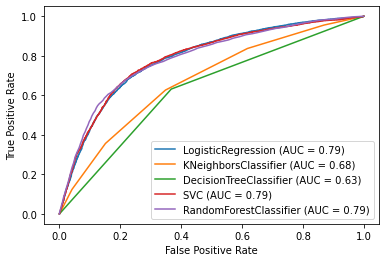

In [24]:

###################################################################################################################

# Following code is for plotting AUC and ROC curve for all 5 models i-e Logistic Regression, KNN and Decision Tree

#  SVC and Random Forest befoer PCA  

###################################################################################################################

from sklearn.metrics import plot_roc_curve
disp=plot_roc_curve(log_reg_1,x_test,y_test)
plot_roc_curve(knn,x_test,y_test,ax=disp.ax_)
plot_roc_curve(model_tree,x_test,y_test,ax=disp.ax_)
plot_roc_curve(model_svc,x_test,y_test,ax=disp.ax_)
plot_roc_curve(rand_clf,x_test,y_test,ax=disp.ax_)

(69301, 12)


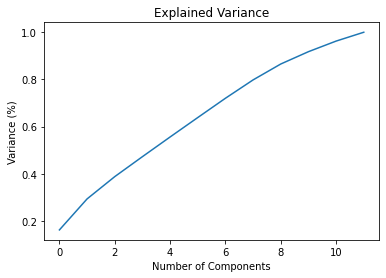

In [49]:
###################################################################################################################

# Following code is for plotting PCA figure to check if we can reduce the no of features and achieve better accuracy

###################################################################################################################

from sklearn.decomposition import PCA
print(data1_scaled.shape)


import matplotlib.pyplot as plt
import numpy as np
pca = PCA()
principalComponents = pca.fit_transform(data1_scaled)
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component
plt.title('Explained Variance')
plt.show()

In [50]:
########################################################################
# Out of 12, 11 components will give maximum variance
#######################################################################
pca = PCA(n_components=11)
data1_scaled_1 = pca.fit_transform(data1_scaled)

principal_x = pd.DataFrame(data1_scaled_1,columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6','PC-7','PC-8','PC-9','PC-10','PC-11'])
principal_x

,PC-1,PC-2,PC-3,PC-4,PC-5,PC-6,PC-7,PC-8,PC-9,PC-10,PC-11
0,1.379768,1.831519,-0.677744,-0.001910,-1.632720,-0.222466,0.641820,-0.656190,-0.341000,0.038873,0.369671
1,0.651718,-1.260100,-0.132058,-0.237734,-1.636996,-0.643589,0.748617,1.543948,0.401770,0.092572,-0.022279
2,0.750101,-0.337102,0.114527,0.194414,-1.604780,-0.311924,0.622806,-1.111860,0.098144,-0.149550,0.229231
3,-4.052344,-1.220429,-3.494808,0.128796,-1.816847,0.533333,0.255292,1.107967,1.617007,0.009218,0.196859
4,1.597745,-0.220467,-0.567191,0.361202,-1.627636,-0.044917,0.499615,-1.700609,-0.167566,0.021245,0.261643
...,...,...,...,...,...,...,...,...,...,...,...
69296,-2.394574,-0.829590,-0.985373,0.168484,1.718982,-0.091311,-0.303964,-0.411472,-0.794702,2.191548,0.341200
69297,-0.030774,2.923807,1.101898,0.285224,1.696744,-0.620649,-0.149362,-0.552523,2.518022,1.003733,0.755976
69298,-3.888535,1.750934,-0.007102,-0.389192,1.471621,1.957142,-1.169339,0.552484,2.240432,-2.643675,-2.094565
69299,0.875406,0.938252,0.590898,-0.547264,1.500468,1.728192,-1.226408,-0.455481,-0.214252,-0.222526,1.384929


In [51]:
##################################################################################################

# The following code is for finding accuracy for Logistic Regression with PCA(n=11)

##################################################################################################

x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.19, random_state= 355)

logistic_model=linear_model.LogisticRegression()
logistic_model.fit(x_train,y_train)
print('Accuracy for Logistic Regression with PCA Before CV::::',logistic_model.score(x_test,y_test))

y_pred=logistic_model.predict(x_test)
F1_LR_Before_CV_with_PCA_11=f1_score(y_test,y_pred,average='macro')

Accuracy for Logistic Regression with PCA Before CV:::: 0.7282806804374241


In [28]:
##################################################################################################
# Following code is for Hyper parameter tuning for Logistic Regression with PCA 11
# C is inverse of regularization strength
# l1 and l2 are penalities (lasso and ridge)
# saga is used for large data 
##################################################################################################

C = np.logspace(0, 10, num=10)

penalty = ['l2','l1']
solver = ['saga','liblinear']

hyperparameters = dict(C=C, penalty=penalty, solver=solver)
gridsearch = GridSearchCV(logistic_model, hyperparameters,verbose=1, n_jobs=-1)
print('-----------------------------------------------------------------------------')

best_model_random = gridsearch.fit(x_train,y_train)
print('Best Estimator::::',best_model_random.best_estimator_)
print('Best score::::', best_model_random.best_score_)
print('Best Params::::',best_model_random.best_params_)

-----------------------------------------------------------------------------
Fitting 5 folds for each of 40 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:  7.3min finished


Best Estimator:::: LogisticRegression(C=12.91549665014884, solver='liblinear')
Best score:::: 0.718240669115619
Best Params:::: {'C': 12.91549665014884, 'penalty': 'l2', 'solver': 'liblinear'}


In [71]:
###########################################################################################################################

# The following code finds the model accuracy after CV with PCA (n=11) for Logistic Regression

###########################################################################################################################

logistic_model=linear_model.LogisticRegression(C=12.91549665014884, penalty='l2', solver='liblinear')
logistic_model.fit(x_train,y_train)
print(' Accuracy score for Logistic Regression after CV with PCA::::', logistic_model.score(x_test,y_test))

y_pred=logistic_model.predict(x_test)
F1_LR_After_CV_with_PCA_11=f1_score(y_test,y_pred,average='macro')


 Accuracy score for Logistic Regression after CV with PCA:::: 0.7279769137302552


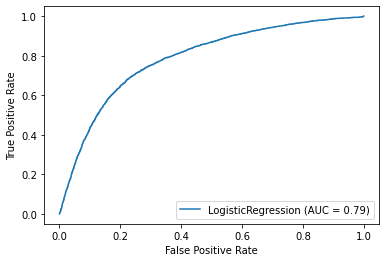

In [72]:
########################################################
# Plotting ROC AUC curve for Logistic Regression with PCA
########################################################

disp=plot_roc_curve(logistic_model,x_test,y_test)

In [76]:

##################################################################################################

# The following code is to find the accuracy for SVC with PCA (n=11)

##################################################################################################

from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.svm import SVC
x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.19, random_state= 355)
model_svc=SVC()

model_svc.fit(x_train,y_train)

print('Accuracy for SVC before CV after PCA::::', model_svc.score(x_test,y_test))

y_pred=model_svc.predict(x_test)
F1_SVC__before_CV_with_PCA_11=f1_score(y_test,y_pred,average='macro')


Accuracy for SVC before CV after PCA:::: 0.7339763061968408


In [12]:
##################################################################################################

# The following code performs the CV for SVC with PCA (n=11)

##################################################################################################

param_grid={'C':[0.1,1,10,50,100,500],'gamma':[1.0,0.5,0.1,0.01,0.001]}
grid_svc= GridSearchCV(model_svc,param_grid)

grid_svc.fit(x_train,y_train)

print('Best Estimator ::::',grid_svc.best_estimator_)
print('Best score::::', grid_svc.best_score_)
print('Best Params::::',grid_svc.best_params_)

print('-----------------------------------------------------------------------------')


Best Estimator :::: SVC(C=500, gamma=0.01)
Best score:::: 0.7305862319926205
Best Params:::: {'gamma': 0.01, 'C': 500}
-----------------------------------------------------------------------------


In [77]:
###########################################################################################################################

# The following code finds the model accuracy after CV with PCA (n=11) for SVC

###########################################################################################################################

model_svc=SVC(C=500, gamma=0.01)
model_svc.fit(x_train,y_train)
print('SVC accuracy after hyper parameter tuning after PCA', model_svc.score(x_test,y_test))


y_pred=model_svc.predict(x_test)
F1_SVC__after_CV_with_PCA_11=f1_score(y_test,y_pred,average='macro')

SVC accuracy after hyper parameter tuning after PCA 0.7380012150668287


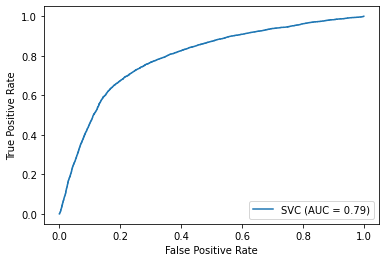

In [78]:
################################################################################
# Plotting ROC AUC curve for SVC
################################################################################

disp4=plot_roc_curve(model_svc,x_test,y_test)

In [64]:
from sklearn.ensemble import RandomForestClassifier
##################################################################################################

# The following code is for finding accuracy for Random Forest with PCA=11

##################################################################################################

x_train,x_test,y_train,y_test = train_test_split(principal_x,target,test_size = 0.18, random_state= 355)
rand_clf = RandomForestClassifier(random_state=6)
rand_clf.fit(x_train,y_train)
print('Accuracy for RF after PCA and before CV::::',rand_clf.score(x_test,y_test))


y_pred=rand_clf.predict(x_test)
F1_RF_before_CV_with_PCA_11=f1_score(y_test,y_pred,average='macro')

Accuracy for RF after PCA and before CV:::: 0.7129458917835672


In [80]:
##################################################################################################

# The following code is for finding accuracy for RandomForest without PCA

##################################################################################################

from sklearn.ensemble import RandomForestClassifier
# 72957 0.19
x_train,x_test,y_train,y_test = train_test_split(data1_scaled,target,test_size = 0.19, random_state= 355)
rand_clf = RandomForestClassifier(random_state=6)
rand_clf.fit(x_train,y_train)
print('RF Acccurcy before  CV',rand_clf.score(x_test,y_test))

y_pred=rand_clf.predict(x_test)
F1_RF_before_Hyper_score=f1_score(y_test,y_pred)


RF Acccurcy before  CV 0.7295716889428918


In [12]:
##################################################################################################
# Following code is for Hyper parameter tuning for Random Forest without PCA
##################################################################################################

grid_param = {
    "n_estimators" : [90,100],
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,5),
    'min_samples_leaf' : range(1,10,4),
    'min_samples_split': range(2,10,4),
    'max_features' : ['auto','log2']
}

grid_search_RF = GridSearchCV(estimator=rand_clf,param_grid=grid_param,cv=4,n_jobs =-1,verbose = 3)
grid_search_RF.fit(x_train,y_train)


print('Best Estimator ::::',grid_search_RF.best_estimator_)
print('Best score::::', grid_search_RF.best_score_)
print('Best Params::::',grid_search_RF.best_params_)

print('-----------------------------------------------------------------------------')

Fitting 4 folds for each of 192 candidates, totalling 768 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:  1.9min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  6.6min
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed: 22.2min
[Parallel(n_jobs=-1)]: Done 504 tasks      | elapsed: 42.6min
[Parallel(n_jobs=-1)]: Done 768 out of 768 | elapsed: 81.2min finished


Best Estimator :::: RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=6,
                       n_estimators=90, random_state=6)
Best score:::: 0.7342739105437872
Best Params:::: {'criterion': 'entropy', 'max_depth': 12, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 90}
-----------------------------------------------------------------------------


In [81]:

###########################################################################################################################

# The following code finds the model accuracy with CV with out PCA for Random FOrest

###########################################################################################################################
rand_clf = RandomForestClassifier(criterion='entropy', max_depth=12, min_samples_split=6,
                       n_estimators=90, random_state=6)


rand_clf.fit(x_train,y_train)
print('Accuracy for RF after PCA and after CV::::',rand_clf.score(x_test,y_test))

y_pred=rand_clf.predict(x_test)
F1_RF_after_CV_with_out_PCA_11=f1_score(y_test,y_pred,average='macro')

Accuracy for RF after PCA and after CV:::: 0.7386846901579587


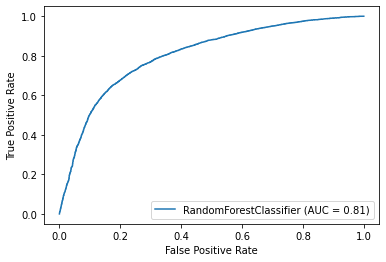

In [82]:
################################################################################
# Plotting ROC AUC curve for RF
################################################################################

disp2=plot_roc_curve(rand_clf,x_test,y_test)
#plot_roc_curve(model_svc,x_test,y_test)

In [ ]:
##################################################################

#   F1 scores for all 3 models in various possibilities:

#################################################################

In [67]:
print('F1 score for Logistic Regression before Grid Search CV : ',F1_LR_Before_CV)
print('F1 score for KNN before Randomized Search CV : ',F1_KNN_Before_CV)
print('F1 score for Decision Tree before Randomized Search CV : ',F1_DT_Before_CV)
print('F1 score for SVC before Grid Search CV : ',F1_SVC_Before_CV)
print('F1 score for RandomForest  before Grid Search CV : ',F1_RF_before_Hyper_score)
print('-------------------------------------------------------------------------')

print('-------------------------------------------------------------------------')

print('F1 score for Logistic Regression before CV with PCA: ',F1_LR_Before_CV_with_PCA_11)
print('F1 score for SVC before CV with PCA: ',F1_SVC__before_CV_with_PCA_11)
print('F1 score for RandomForest before CV with PCA: ',F1_RF_before_CV_with_PCA_11)

print('-------------------------------------------------------------------------')

print('F1 score for Logistic Regression after CV with PCA: ',F1_LR_After_CV_with_PCA_11)
print('F1 score for SVC after CV with PCA: ',F1_SVC__after_CV_with_PCA_11)
print('F1 score for RandomForest after CV with out PCA: ',F1_RF_after_CV_with_out_PCA_11)

F1 score for Logistic Regression before Grid Search CV :  0.7163280662151995
F1 score for KNN before Randomized Search CV :  0.6352799931395248
F1 score for Decision Tree before Randomized Search CV :  0.6295070840756766
F1 score for SVC before Grid Search CV :  0.7249607535321821
F1 score for RandomForest  before Grid Search CV :  0.7245726660994664
-------------------------------------------------------------------------
-------------------------------------------------------------------------
F1 score for Logistic Regression before CV with PCA:  0.7278628042026786
F1 score for SVC before CV with PCA:  0.7336883500707976
F1 score for RandomForest before CV with PCA:  0.7129442317086825
-------------------------------------------------------------------------
F1 score for Logistic Regression after CV with PCA:  0.7280116722954533
F1 score for SVC after CV with PCA:  0.7376289608615427
F1 score for RandomForest after CV with out PCA:  0.7381134433302513
